In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import os

In [83]:
# reading in data
spam_df = pd.read_csv('data/spam.csv',encoding='latin')

# structure of data
print("The number of records in the data is:",len(spam_df.axes[0]))
print("The number of fields in the data is:",len(spam_df.axes[1]))

The number of records in the data is: 5572
The number of fields in the data is: 5


In [84]:
# preview
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [85]:
# basic info
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [86]:
# renaming columns
spam_df.rename({'v1':'target','v2':'text'},axis=1,inplace=True)

# dropping columns with null values
spam_df = spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

# preview
spam_df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
# encoding target variable
spam_df['target'] = spam_df['target'].map(dict(spam=1, ham=0))
spam_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Data checks

In [88]:
# checking null values
spam_df.isnull().sum()

target    0
text      0
dtype: int64

In [89]:
##Check for Duplicated Values
spam_df.duplicated().sum()

403

In [90]:
##Remove Duplicates
spam_df = spam_df.drop_duplicates(keep='first')

In [91]:
# final shape
spam_df.shape

(5169, 2)

#### checking class representation in target column

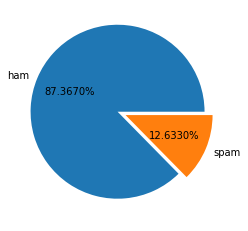

In [92]:
plt.pie(spam_df['target'].value_counts(),labels=['ham','spam'],autopct='%0.4f%%',explode=[0.1,0])
plt.show()

Will address class imbalance later on...

#### text processing using NLTK

In [93]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

from textblob import TextBlob #library for processing textual data
from wordcloud import WordCloud, STOPWORDS #graphical representation of word frequencies


[nltk_data] Downloading package punkt to /Users/raghu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/raghu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
# num of characters
spam_df['length'] = spam_df['text'].apply(len)

# num of words / tokens
spam_df['num_words'] = spam_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# num of sentences
spam_df['num_sent'] = spam_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [95]:
spam_df.head()

,target,text,length,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### lowercase text, tokenization, remove special characters, remove stopwords and punctuation, stemming

In [96]:
import string

ps = PorterStemmer()

def cleaning_text(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

In [97]:
cleaning_text('Hey!! Did you get my memo from last night?? I am excited to visit you for graduation! yay :)')

'hey get memo last night excit visit graduat yay'

In [98]:
spam_df['cleaned_text'] = spam_df['text'].apply(cleaning_text)

In [99]:
spam_df.head()

,target,text,length,num_words,num_sent,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [100]:
# grouping data to understand the relationshi between churn and other factors
spam_df.groupby('target').describe().T

target                     0           1
length    count  4516.000000  653.000000
          mean     70.459256  137.891271
          std      56.358207   30.137753
          min       2.000000   13.000000
          25%      34.000000  132.000000
          50%      52.000000  149.000000
          75%      90.000000  157.000000
          max     910.000000  224.000000
num_words count  4516.000000  653.000000
          mean     17.120903   27.667688
          std      13.493725    7.008418
          min       1.000000    2.000000
          25%       8.000000   25.000000
          50%      13.000000   29.000000
          75%      22.000000   32.000000
          max     220.000000   46.000000
num_sent  count  4516.000000  653.000000
          mean      1.799601    2.967841
          std       1.278465    1.483201
          min       1.000000    1.000000
          25%       1.000000    2.000000
          50%       1.000000    3.000000
          75%       2.000000    4.000000
          max      28.000000    8.000000

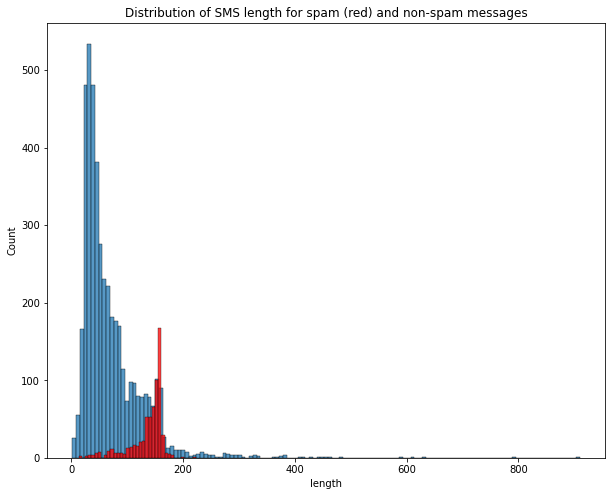

In [101]:


plt.figure(figsize=(10,8))
plt.title('Distribution of SMS length for spam (red) and non-spam messages')
sns.histplot(spam_df[spam_df['target'] == 0]['length'])
sns.histplot(spam_df[spam_df['target'] == 1]['length'],color='red')
plt.show()

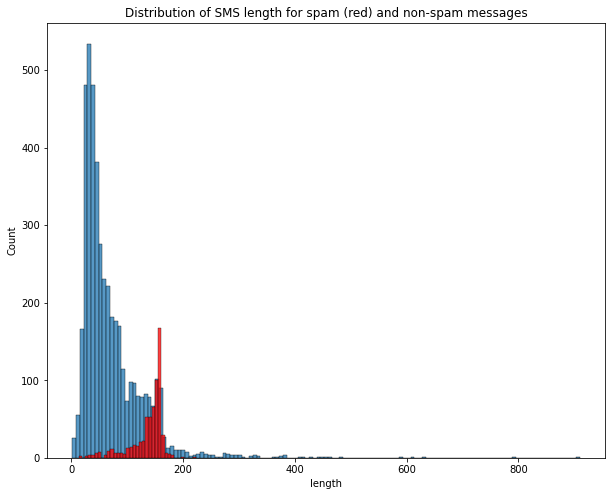

 avg length of spam messages: 137.89
 avg length of non-spam messages: 70.46
 Mean difference in length: 67.43201507791932 



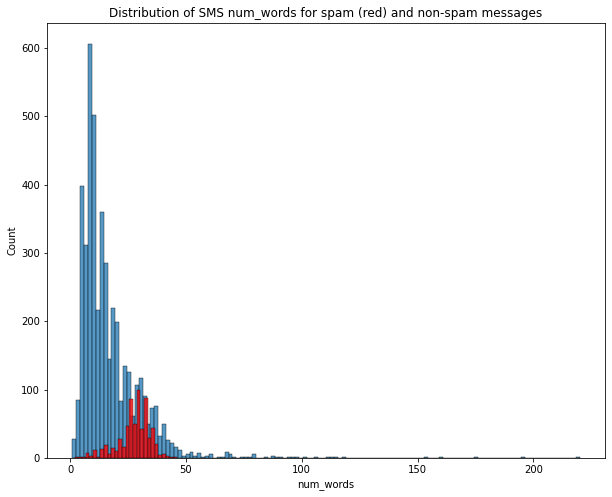

 avg num_words of spam messages: 27.67
 avg num_words of non-spam messages: 17.12
 Mean difference in num_words: 10.546784141327688 



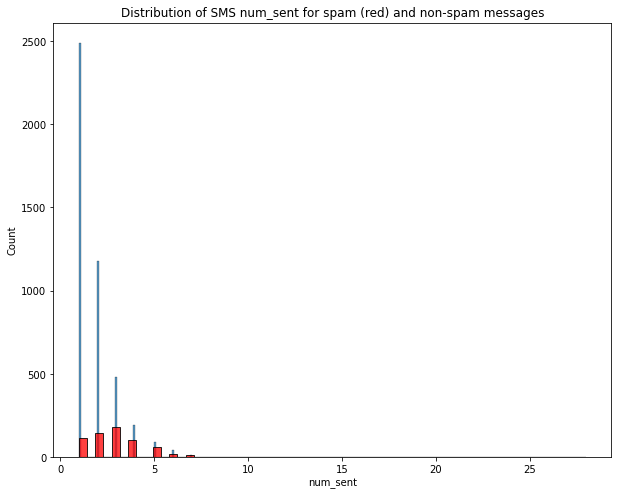

 avg num_sent of spam messages: 2.97
 avg num_sent of non-spam messages: 1.8
 Mean difference in num_sent: 1.1682393178855646 



In [116]:
import seaborn as sns

# plot distributions of 'length', 'num_words', and 'num_sent' against spam and non-spam messages
for col in ['length', 'num_words', 'num_sent' ]:
    plt.figure(figsize=(10,8))
    plt.title(f'Distribution of SMS {col} for spam (red) and non-spam messages')
    sns.histplot(spam_df[spam_df['target'] == 0][col])
    sns.histplot(spam_df[spam_df['target'] == 1][col],color='red')
    plt.show()

    print(f" avg {str(col)} of spam messages: {spam_df[spam_df['target']==1][col].mean().round(2)}")
    print(f" avg {str(col)} of non-spam messages: {spam_df[spam_df['target']==0][col].mean().round(2)}")
    print(f" Mean difference in {str(col)}: {spam_df[spam_df['target']==1][col].mean() - spam_df[spam_df['target']==0][col].mean()} \n")

#### wordclouds

In [103]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

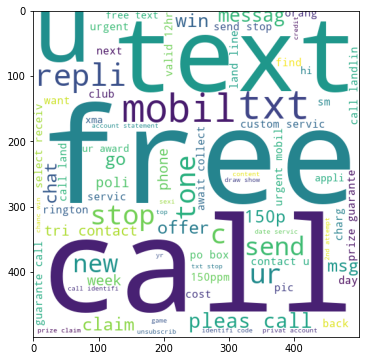

In [104]:
## Spam Word Cloud
spam_wc = wc.generate(spam_df[spam_df['target'] == 1]['cleaned_text'].str.cat(sep = " "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)
plt.show()

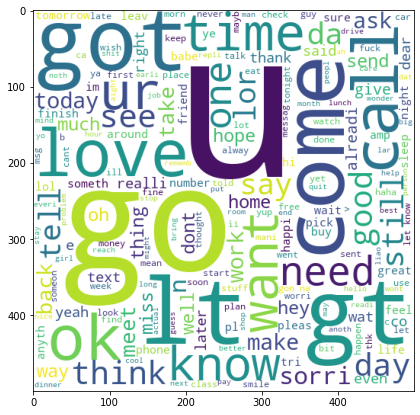

In [105]:
## Ham Word Cloud
spam_wc = wc.generate(spam_df[spam_df['target'] == 0]['cleaned_text'].str.cat(sep = " "))
plt.figure(figsize=(12,7))
plt.imshow(spam_wc)
plt.show()

#### model building

In [106]:
#Convert Our SMS text to Vectors Using Bag of Words Technique
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer()

In [107]:
X = tf.fit_transform(spam_df['cleaned_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
y = np.array(spam_df['target'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [109]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=258,test_size=0.20)

In [110]:
# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (4135, 6708) (4135,)
Test set shape: (1034, 6708) (1034,)


#### making predictions

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [112]:
# Define a list of models
models = [
    ('Logistic Regression', LogisticRegression(penalty='l1', solver='liblinear')),
    ('SVM', SVC(kernel='sigmoid', gamma=1.0)),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=50, random_state=2)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=50, random_state=2)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=2)),
    ('Bagging', BaggingClassifier(n_estimators=50, random_state=2)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=50, random_state=2)),
    ('XGBoost', XGBClassifier(n_estimators=50, random_state=2))
]

# Create an empty dictionary to store the results
results = {}


# Train and evaluate each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store the results in the dictionary
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Confusion Matrix': cm
    }

In [113]:
results

{'Logistic Regression': {'Accuracy': 0.9516441005802708,
  'Precision': 0.8969072164948454,
  'Recall': 0.6850393700787402,
  'F1': 0.7767857142857143,
  'Confusion Matrix': array([[897,  10],
         [ 40,  87]])},
 'SVM': {'Accuracy': 0.9738878143133463,
  'Precision': 0.9629629629629629,
  'Recall': 0.8188976377952756,
  'F1': 0.8851063829787233,
  'Confusion Matrix': array([[903,   4],
         [ 23, 104]])},
 'Multinomial Naive Bayes': {'Accuracy': 0.9632495164410058,
  'Precision': 1.0,
  'Recall': 0.7007874015748031,
  'F1': 0.824074074074074,
  'Confusion Matrix': array([[907,   0],
         [ 38,  89]])},
 'Decision Tree': {'Accuracy': 0.9497098646034816,
  'Precision': 0.8571428571428571,
  'Recall': 0.7086614173228346,
  'F1': 0.7758620689655171,
  'Confusion Matrix': array([[892,  15],
         [ 37,  90]])},
 'K-Nearest Neighbors': {'Accuracy': 0.9081237911025145,
  'Precision': 1.0,
  'Recall': 0.25196850393700787,
  'F1': 0.4025157232704403,
  'Confusion Matrix': array(

In [114]:
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')

# Print the results
print(results_df)

                         Accuracy  Precision    Recall        F1  \
Logistic Regression      0.951644   0.896907  0.685039  0.776786   
SVM                      0.973888   0.962963  0.818898  0.885106   
Multinomial Naive Bayes  0.963250   1.000000  0.700787  0.824074   
Decision Tree            0.949710   0.857143  0.708661  0.775862   
K-Nearest Neighbors      0.908124   1.000000  0.251969  0.402516   
Random Forest            0.976789   1.000000  0.811024  0.895652   
Extra Trees              0.980658   0.990826  0.850394  0.915254   
AdaBoost                 0.968085   0.935185  0.795276  0.859574   
Bagging                  0.974855   0.917355  0.874016  0.895161   
Gradient Boosting        0.952611   0.975610  0.629921  0.765550   
XGBoost                  0.976789   0.981308  0.826772  0.897436   

                               Confusion Matrix  
Logistic Regression       [[897, 10], [40, 87]]  
SVM                       [[903, 4], [23, 104]]  
Multinomial Naive Bayes    [[907,

Precision vs Recall vs F1

precision considers the potential impact of false positives on user experience, productivity, and legal considerations. However, it's important to strike a balance between precision and recall, as overly strict filtering may result in missed spam (false negatives).

recall is also important in a spam classifier to ensure that a high proportion of actual spam instances are captured and correctly classified as spam. By minimizing false negatives, the classifier reduces the risk of missing important spam emails and helps maintain a reliable spam filtering system.

F1 score is a useful metric for spam classification as it offers a balanced assessment of the classifier's performance considering both precision and recall simultaneously. It helps ensure that the classifier effectively identifies spam emails while minimizing false positives, taking into account the specific requirements and objectives of spam classification tasks.


In [119]:
# models sorted by precision
results_df.sort_values(by='F1', ascending=False)

,Accuracy,Precision,Recall,F1,Confusion Matrix
Extra Trees,0.980658,0.990826,0.850394,0.915254,"[[906, 1], [19, 108]]"
XGBoost,0.976789,0.981308,0.826772,0.897436,"[[905, 2], [22, 105]]"
Random Forest,0.976789,1.000000,0.811024,0.895652,"[[907, 0], [24, 103]]"
Bagging,0.974855,0.917355,0.874016,0.895161,"[[897, 10], [16, 111]]"
SVM,0.973888,0.962963,0.818898,0.885106,"[[903, 4], [23, 104]]"
AdaBoost,0.968085,0.935185,0.795276,0.859574,"[[900, 7], [26, 101]]"
Multinomial Naive Bayes,0.963250,1.000000,0.700787,0.824074,"[[907, 0], [38, 89]]"
Logistic Regression,0.951644,0.896907,0.685039,0.776786,"[[897, 10], [40, 87]]"
Decision Tree,0.949710,0.857143,0.708661,0.775862,"[[892, 15], [37, 90]]"
Gradient Boosting,0.952611,0.975610,0.629921,0.765550,"[[905, 2], [47, 80]]"


We will consider the Extra Trees model to be the best performing model as it has the highest f1 score and has a good balance between precision and recall. We will now tune this model using hyperparmeter grid search.

In [118]:
from sklearn.model_selection import GridSearchCV

# Create the Extra Trees classifier
extra_trees = ExtraTreesClassifier(random_state=2)

# Define the hyperparameters to tune and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(extra_trees, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and evaluate the model
best_params = grid_search.best_params_

print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

best_estimator = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_estimator.fit(X_train, y_train)

# Predict on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:", cm)

Best Hyperparameters:
max_depth: None
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 200
Accuracy: 0.9845261121856866
Precision: 1.0
Recall: 0.8740157480314961
F1 Score: 0.9327731092436975
Confusion Matrix: [[907   0]
 [ 16 111]]
